In [1]:
import matplotlib.pyplot as plot
import numpy as np
import odespy

%matplotlib inline

In [2]:
from pyclouds import cloud_microphysics, parameterisations
from pyclouds.common import Var, ATHAM_constants
from pyclouds.plotting import plot_hydrometeor_evolution
from unified_microphysics import constants as um_constants

/home/zmaw/m300464/pytools/pyclouds/cloud_microphysics.py:49: UserWarning: `model_constraint` not provided, assuming isometric
  warnings.warn("`model_constraint` not provided, assuming isometric")
/home/zmaw/m300464/pytools/pyclouds/parameterisations.py:170: UserWarning: Using default value for a1_ice
  warnings.warn("Using default value for %s" % c_name)
/home/zmaw/m300464/pytools/pyclouds/parameterisations.py:170: UserWarning: Using default value for a0_ice
  warnings.warn("Using default value for %s" % c_name)
/home/zmaw/m300464/pytools/pyclouds/parameterisations.py:170: UserWarning: Using default value for b_K
  warnings.warn("Using default value for %s" % c_name)
/home/zmaw/m300464/pytools/pyclouds/parameterisations.py:170: UserWarning: Using default value for a_K
  warnings.warn("Using default value for %s" % c_name)
/usr/lib/pymodules/python2.7/matplotlib/axes.py:2667: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expand

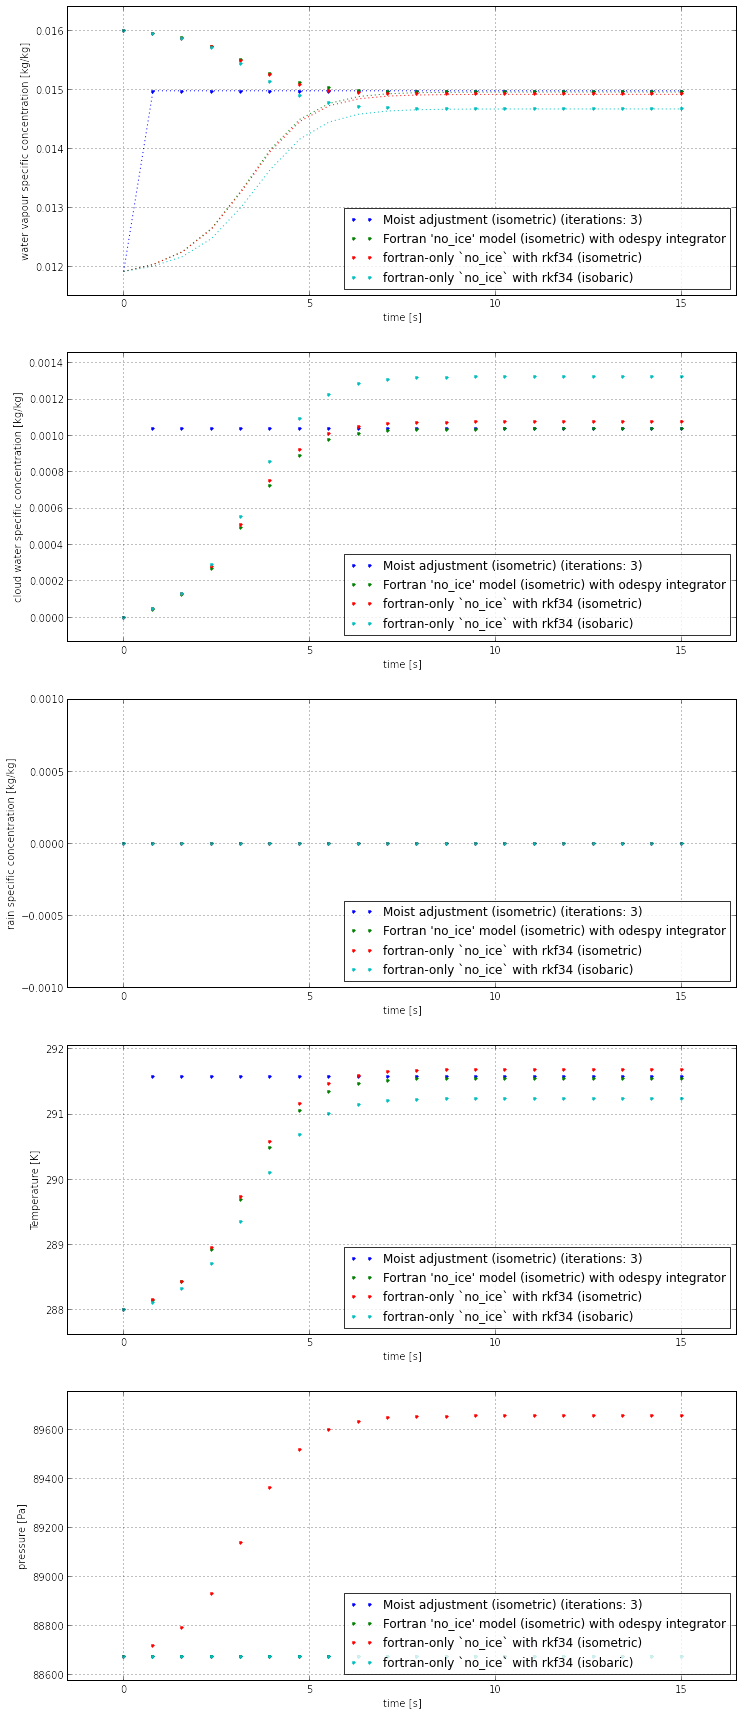

In [3]:
initial_condition = np.zeros((Var.NUM))
initial_condition[Var.q_v] = 1.6e-2
initial_condition[Var.q_l] = 0.0e-2

initial_condition[Var.T] = 288.
initial_condition[Var.p] = 88676. # [Pa]

t_ = np.linspace(0., 15., 20)

SolverClass = odespy.Euler
constants = um_constants

solutions = []
#solutions.append(microphysics_model.integrate(initial_condition=initial_condition, t=t_, p0=p0))
solutions.append(cloud_microphysics.MoistAdjustmentMicrophysics(constants=constants).integrate(initial_condition=initial_condition, t=t_, iterations=3))
#solutions.append(cloud_microphysics.MoistAdjustmentMicrophysics(constants=constants, model_constraint='isobaric').integrate(initial_condition=initial_condition, t=t_, p0=p0, iterations=3))

#solutions.append(cloud_microphysics.FiniteCondensationTimeMicrophysics().integrate(initial_condition=initial_condition, t=t_, p0=p0, SolverClass=SolverClass))
#solutions.append(cloud_microphysics.FiniteCondensationTimeMicrophysics(constants=constants, disable_rain=False).integrate(initial_condition=initial_condition, t=t_, p0=p0, SolverClass=SolverClass))
#solutions.append(cloud_microphysics.FiniteCondensationTimeMicrophysics(r_crit=np.inf).integrate(initial_condition=initial_condition, t=t_, p0=p0, SolverClass=SolverClass))
solutions.append(cloud_microphysics.FortranNoIceMicrophysics(model_constraint='isometric').integrate(initial_condition=initial_condition, t=t_))
solutions.append(cloud_microphysics.ExplicitFortranModel(model_constraint='isometric').integrate(initial_condition=initial_condition, t=t_))
solutions.append(cloud_microphysics.ExplicitFortranModel(model_constraint='isobaric').integrate(initial_condition=initial_condition, t=t_))
#solutions.append(cloud_microphysics.OldATHAMKesslerFortran().integrate(initial_condition=initial_condition, t=t_))



#sol2.plot()
plot = plot_hydrometeor_evolution(solutions, variables=['q_v', 'q_l', 'q_r', 'T', 'p',])